In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in csv file
df = pd.read_csv('responces .csv')
#Show both the head and tail of the dataset
pd.set_option('display.max_rows', 10)
df

,Timestamp,Do you currently live in the United kingdom?,Are you familiar with the general concept of Artificial Intelligence (AI)?,How would you assess your understanding of Artificial Intelligence (AI) and its applications?,To what degree are you familiar with the role of AI in migration management in the United Kingdom?,Are you aware of any potential positive consequences associated with the use of AI in migration management?,Are you aware of any potential negative consequences associated with the use of AI in migration management?,"In your opinion, how transparent is the information available to the public regarding the implementation of AI in migration management in the United Kingdom?",How likely are you to seek information about AI in migration management independently?,What is your age?,What is your gender?,What is your ethnicity?,Are you or have you ever been a refugee or migrant to the UK?,"If you have any specific feedback or suggestions for improvement, please share them in the space provided",Unnamed: 14,Unnamed: 15
0,2023/12/14 1:09:07 pm CET,Yes,Yes,Moderate,Moderately familiar,Yes,Yes,Not transparent at all,Likely,18-24,Female,"Black, Black British, Caribbean or African",No,NaN,You have added a random option 3 to one of the...,4.0
1,2023/12/14 1:13:07 pm CET,Yes,Yes,Limited,Not familiar at all,No,No,Not transparent at all,Neutral,25-34,Female,"Black, Black British, Caribbean or African",No,NaN,I think it’s best to use layman language becau...,2.0
2,2023/12/14 1:13:28 pm CET,Yes,Yes,Limited,Not familiar at all,No,Yes,Not transparent at all,Unlikely,18-24,Female,"Black, Black British, Caribbean or African",No,NaN,No feedback.,5.0
3,2023/12/14 1:16:17 pm CET,Yes,Yes,Limited,Not familiar at all,No,Yes,Not transparent at all,Unlikely,18-24,Female,"Black, Black British, Caribbean or African",No,NaN,Survey was clear. I was not confused by the qu...,5.0
4,2023/12/14 5:57:43 pm CET,Yes,Yes,Moderate,Not familiar at all,No,No,Not transparent at all,Very unlikely,35-44,Female,"Black, Black British, Caribbean or African",Yes,NaN,None,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,2024/03/12 2:37:27 pm CET,Yes,Yes,Moderate,Slightly familar,No,Yes,Not transparent at all,Neutral,18-24,Female,Mixed or multiple ethnic groups,No,NaN,NaN,NaN
31,2024/03/12 2:59:20 pm CET,Yes,Yes,Limited,Not familiar at all,No,No,Not transparent at all,Unlikely,18-24,Female,White,No,NaN,NaN,NaN
32,2024/03/13 3:31:52 am CET,No,Yes,Advanced,Not familiar at all,No,No,Not transparent at all,Neutral,25-34,Male,White,No,NaN,NaN,NaN
33,2024/03/13 3:19:13 pm CET,Yes,Yes,Advanced,Not familiar at all,No,No,Not transparent at all,Unlikely,18-24,Male,White,No,NaN,NaN,NaN


In [142]:
#Rename columns
column_name={'Do you currently live in the United kingdom? ': 'uk',
             'Are you familiar with the general concept of Artificial Intelligence (AI)?': 'general familiarity',
             'How would you assess your understanding of Artificial Intelligence (AI) and its applications?': 'general understanding',
             'To what degree are you familiar with the role of AI in migration management in the United Kingdom?': 'migration familiarity',
             'Are you aware of any potential positive consequences associated with the use of AI in migration management?':'positive',
             'Are you aware of any potential negative consequences associated with the use of AI in migration management?':'negative',
             'In your opinion, how transparent is the information available to the public regarding the implementation of AI in migration management in the United Kingdom?': 'transparent',
             'How likely are you to seek information about AI in migration management independently?': 'seek information',
             'What is your age?': 'age',
             'What is your gender?': 'gender',
             'What is your ethnicity? ': 'ethnicity',
             'Are you or have you ever been a refugee or migrant to the UK? ': 'migrant',
             'How did you find the survey questions in terms of clarity and ease of understanding? ':'pilot',
             'If you have any specific feedback or suggestions for improvement, please share them in the space provided ':'feedback'
                } 
df.rename(columns=column_name, inplace=True)


#Display questions only used in the final survey not the pilot survey
survey_df= df.iloc[:, 0:13]

#Drop column index 0
survey_df= survey_df.drop(survey_df.columns[0], axis=1)

survey_df

,uk,general familiarity,general understanding,migration familiarity,positive,negative,transparent,seek information,age,gender,ethnicity,migrant
0,Yes,Yes,Moderate,Moderately familiar,Yes,Yes,Not transparent at all,Likely,18-24,Female,"Black, Black British, Caribbean or African",No
1,Yes,Yes,Limited,Not familiar at all,No,No,Not transparent at all,Neutral,25-34,Female,"Black, Black British, Caribbean or African",No
2,Yes,Yes,Limited,Not familiar at all,No,Yes,Not transparent at all,Unlikely,18-24,Female,"Black, Black British, Caribbean or African",No
3,Yes,Yes,Limited,Not familiar at all,No,Yes,Not transparent at all,Unlikely,18-24,Female,"Black, Black British, Caribbean or African",No
4,Yes,Yes,Moderate,Not familiar at all,No,No,Not transparent at all,Very unlikely,35-44,Female,"Black, Black British, Caribbean or African",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
30,Yes,Yes,Moderate,Slightly familar,No,Yes,Not transparent at all,Neutral,18-24,Female,Mixed or multiple ethnic groups,No
31,Yes,Yes,Limited,Not familiar at all,No,No,Not transparent at all,Unlikely,18-24,Female,White,No
32,No,Yes,Advanced,Not familiar at all,No,No,Not transparent at all,Neutral,25-34,Male,White,No
33,Yes,Yes,Advanced,Not familiar at all,No,No,Not transparent at all,Unlikely,18-24,Male,White,No


# Visualising the demographic characteristics of the survey respondents.


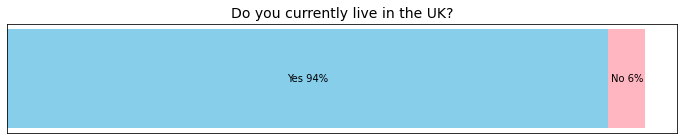

In [216]:
#Visualising the question 'Do you currently live in the UK?' with a stacked bar

#Calculate the percentage of Yes and No answers
uk_counts = survey_df['uk'].value_counts()
percentage = uk_counts / uk_counts.sum() * 100

#Plot the stacked bar for all categories manually
plt.figure(figsize=(12, 2))
plt.barh('uk', percentage['Yes'], color='skyblue', label='Yes')
plt.barh('uk', percentage['No'], left=percentage['Yes'], color='lightpink', label='No')

#Add labels to bars and remove axis labels 
plt.text(percentage['Yes'] / 2, 0, f"Yes {percentage['Yes']:.0f}%", ha='center', va='center')
plt.text(percentage['Yes'] + percentage['No'] / 2, 0, f"No {percentage['No']:.0f}%", ha='center', va='center')
plt.title('Do you currently live in the UK?', fontsize='14')
plt.xticks([])
plt.yticks([])

#Display
plt.show()


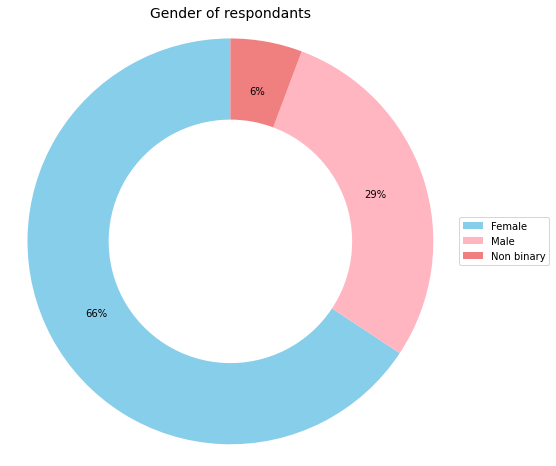

In [232]:
#Count the occurance of each gender
ethnicity_counts = survey_df['gender'].value_counts()

#Plot
custom_colours = ['skyblue',  'lightpink','lightcoral', 'lightgreen', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=None,autopct='%1.0f%%', startangle=90, wedgeprops=dict(width=0.4), colors=custom_colours, pctdistance=0.75)
plt.legend(labels=ethnicity_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.title('Gender of respondants', fontsize=14)

#Display
plt.show()



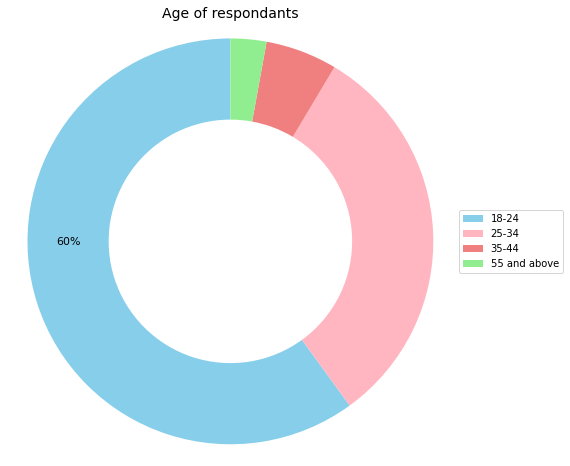

In [92]:
#Visualising age with a piechart

#Count the occurance of each age group
age_counts = survey_df['age'].value_counts()

#Calculate the total count of all age groups
total_count = age_counts.sum()

#Plot
custom_colours = ['skyblue',  'lightpink','lightcoral', 'lightgreen', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=None, startangle=90, wedgeprops=dict(width=0.4), colors=custom_colours, pctdistance=0.75)
plt.legend(labels=age_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.title('Age of respondants',fontsize=14)

#Displaying the percentage of the "18-24" age group on the pie chart
percentage_18_24 = (age_counts['18-24'] / total_count) * 100
plt.text(-0.8, 0, f'{percentage_18_24:.0f}%', ha='center', va='center', fontsize=11)

#Display
plt.show()




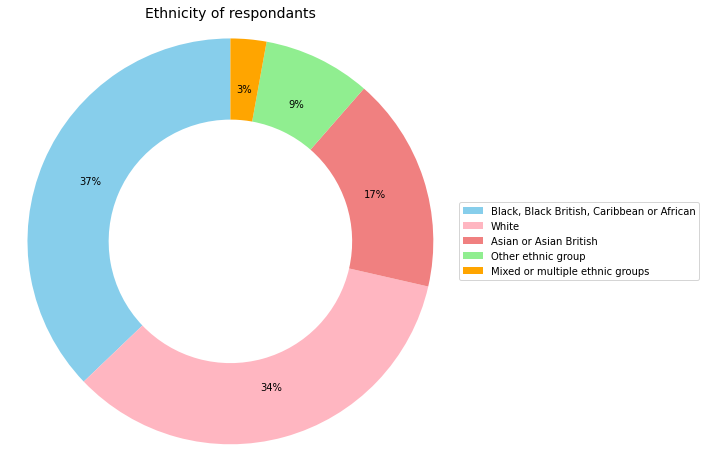

In [231]:
#Visualising ethnicity with a piechart

#Count the occurance of each ethnicity
ethnicity_counts = survey_df['ethnicity'].value_counts()

#Plot
custom_colours = ['skyblue',  'lightpink','lightcoral', 'lightgreen', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts, labels=None,autopct='%1.0f%%', startangle=90, wedgeprops=dict(width=0.4), colors=custom_colours, pctdistance=0.75)
plt.legend(labels=ethnicity_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.title('Ethnicity of respondants', fontsize=14)

#Display
plt.show()

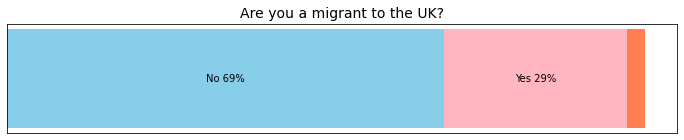

In [317]:
#Visualising migration status with a stacked bar

#Calculate the percentage of Yes , No and Prefer not to say answers
migrant_counts = survey_df['migrant'].value_counts()
percentage = migrant_counts / migrant_counts.sum() * 100

#Plot the stacked bar for all categories manually
plt.figure(figsize=(12, 2))
plt.barh('Migrant', percentage['No'], color='skyblue', label='No')
plt.barh('Migrant', percentage['Yes'], left=percentage['No'], color='lightpink', label='Yes')
plt.barh('Migrant', percentage['Prefer to to say'], left=percentage['Yes']+percentage['No'], color='coral', label='Prefer not to say')

#Add labels to bars and remove axis labels 
plt.text(percentage['No'] / 2, 0, f"No {percentage['No']:.0f}%", ha='center', va='center')
plt.text(percentage['No'] + percentage['Yes'] / 2, 0, f"Yes {percentage['Yes']:.0f}%", ha='center', va='center')
#Prefer not to say is too messy to label
#plt.text(percentage['No'] + percentage['Yes'] + percentage['Prefer to to say'] / 2, 0, f"{percentage['Prefer to to say']:.0f}%", ha='center', va='center')
plt.title('Are you a migrant to the UK?', fontsize='14')
plt.xticks([])
plt.yticks([])


#Display
plt.show()


# Visualising the survey questions for all respondants


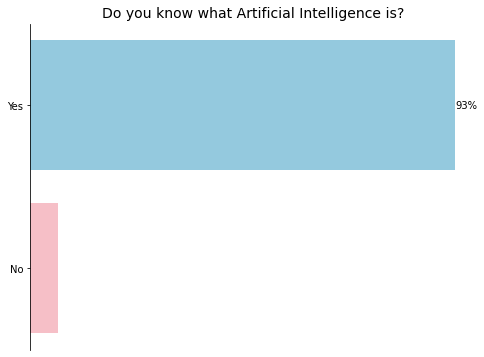

In [314]:
#Visuliasing the question 'Are you familiar with the general concept of Artificial Intelligence (AI)?' with a horizontal bar chart 

#Use responces of respondants who live in the UK
uk_yes = survey_df[survey_df['uk'] == 'Yes']

#Calculate the percentage of Yes and No answers
familiarity_counts= uk_yes['general familiarity'].value_counts()
percentage = familiarity_counts/ familiarity_counts.sum() *100
plt.figure(figsize=(8, 6))

#Plotting the bar chart using seaborn
ax= sns.barplot(x=percentage.values, y=percentage.index, palette= ['skyblue', 'lightpink'])

# Add percentage label next to the 'Yes' bar
plt.text(percentage['Yes'], 0, f'{int(percentage["Yes"])}%', ha='left', va='center', fontsize=10)

#Add labels and remove x axis and spines
plt.title("Do you know what Artificial Intelligence is?", fontsize='14')
sns.despine()
plt.xticks([])
ax.spines['bottom'].set_visible(False)

#Display
plt.show()

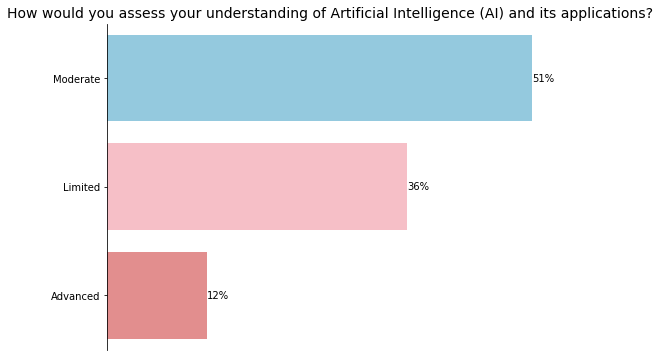

In [174]:
#Visuliasing the question 'Are you familiar with the general concept of Artificial Intelligence (AI)?' with a horizontal bar chart 

#Use responces of respondants who live in the UK
uk_yes = survey_df[survey_df['uk'] == 'Yes']

#Calculate the percentage for each answer
understanding_counts= uk_yes['general understanding'].value_counts()
percentage = understanding_counts/ understanding_counts.sum() *100
plt.figure(figsize=(8, 6))

#Plotting the bar chart using seaborn
ax= sns.barplot(x=percentage.values, y=percentage.index, palette= ['skyblue', 'lightpink','lightcoral'])

# Add percentage label next to each bar
plt.text(percentage['Moderate'], 0, f'{int(percentage["Moderate"])}%', ha='left', va='center', fontsize=10)
plt.text(percentage['Limited'], 1, f'{int(percentage["Limited"])}%', ha='left', va='center', fontsize=10)
plt.text(percentage['Advanced'], 2, f'{int(percentage["Advanced"])}%', ha='left', va='center', fontsize=10)

#Add labels and remove x axis and spines
plt.title("How would you assess your understanding of Artificial Intelligence (AI) and its applications?", fontsize='14')
sns.despine()
plt.xticks([])
ax.spines['bottom'].set_visible(False)
    
#Display
plt.show()

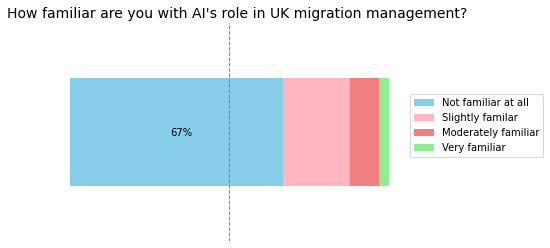

In [264]:
#Visulalising the surevy question 'To what degree are you familiar with the role of AI in migration management in the United Kingdom?' with a stacked bar chart

#Calculate the percentage of responses for each familiarity level
ai_counts = uk_yes['migration familiarity'].value_counts()
percentage = ai_counts / ai_counts.sum() * 100

# Plot the stacked bar, add 50% line
ax = percentage.to_frame().T.plot.barh(stacked=True, color=custom_colours)
ax.set_title('How familiar are you with AI\'s role in UK migration management?', fontsize=14)
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1)
ax.legend(bbox_to_anchor=(1.0, 0.7))

#Remove axis's and spines 
sns.despine()
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks([])
plt.xticks([])

#Add labels and the percentage for 'Not familiar at all'
percentage_not = (ai_counts['Not familiar at all'] / ai_counts.sum()) * 100
plt.text(35, 0, f'{percentage_not:.0f}%', ha='center', va='center', fontsize=10)

#Display
plt.show()



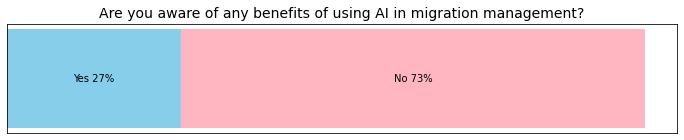

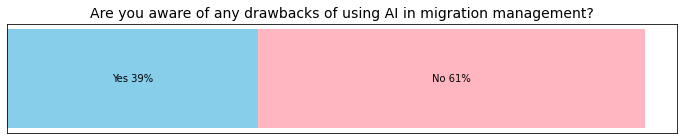

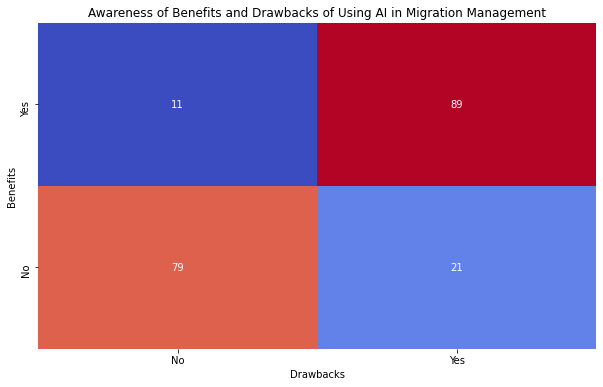

In [238]:
#Visulising the questions 'Are you aware of any potential positive/negative consequences associated with the use of AI in migration management?' with a stacked bar

#Use responces of respondants who live in the UK
uk_yes = survey_df[survey_df['uk'] == 'Yes']

#Calculate the percentage of Yes and No answers
positive_counts = uk_yes['positive'].value_counts()
percentage = positive_counts / positive_counts.sum() * 100

#Plot the stacked bar for all categories manually
plt.figure(figsize=(12, 2))
plt.barh('Positive', percentage['Yes'], color='skyblue', label='Yes')
plt.barh('Positive', percentage['No'], left=percentage['Yes'], color='lightpink', label='No')

#Add labels to bars and remove axis labels 
plt.text(percentage['Yes'] / 2, 0, f"Yes {percentage['Yes']:.0f}%", ha='center', va='center')
plt.text(percentage['Yes'] + percentage['No'] / 2, 0, f"No {percentage['No']:.0f}%", ha='center', va='center')
plt.title('Are you aware of any benefits of using AI in migration management?', fontsize='14')
plt.xticks([])
plt.yticks([])

#Display
plt.show()


#Calculate the percentage of Yes and No answers
negative_counts = uk_yes['negative'].value_counts()
percentage = negative_counts / negative_counts.sum() * 100

#Plot the stacked bar for all categories manually
plt.figure(figsize=(12, 2))
plt.barh('Negative', percentage['Yes'], color='skyblue', label='Yes')
plt.barh('Negative', percentage['No'], left=percentage['Yes'], color='lightpink', label='No')

#Add labels to bars and remove axis labels 
plt.text(percentage['Yes'] / 2, 0, f"Yes {percentage['Yes']:.0f}%", ha='center', va='center')
plt.text(percentage['Yes'] + percentage['No'] / 2, 0, f"No {percentage['No']:.0f}%", ha='center', va='center')
plt.title('Are you aware of any drawbacks of using AI in migration management?', fontsize='14')
plt.xticks([])
plt.yticks([])

#Display
plt.show()

#Heatmap plotting the two above questions against each other
#Generate normalised cross-tabulation for positive and negative consequences
table = pd.crosstab(uk_yes['positive'], uk_yes['negative'], normalize='index') * 100

#Sort by 'Yes' responses for positive consequences
table = table.sort_values(by='Yes', ascending=False)

#Plot heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(table, annot=True, cmap='coolwarm', cbar=False, fmt='.0f')
ax.set_title('Awareness of Benefits and Drawbacks of Using AI in Migration Management')
ax.set_xlabel('Drawbacks')
ax.set_ylabel('Benefits')
plt.show()



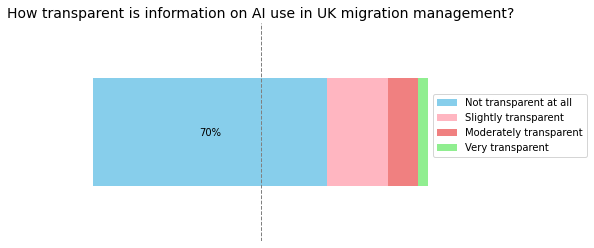

In [304]:
#Visulisaing the question 'In your opinion, how transparent is the information available to the public regarding the implementation of AI in migration management in the United Kingdom?'
#Calculate the percentage of responses for each transparency level
transparent_counts = uk_yes['transparent'].value_counts()
percentage = transparent_counts / transparent_counts.sum() * 100

#Plot the stacked bar, add 50% line
ax = percentage.to_frame().T.plot.barh(stacked=True, color=custom_colours)
ax.set_title('How transparent is information on AI use in UK migration management?', fontsize=14)
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1)
ax.legend(bbox_to_anchor=(1.0, 0.7))

#Remove axis's and spines 
sns.despine()
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks([])
plt.xticks([])

#Add labels and the percentage for 'Not transparent at all'
percentage_not = (transparent_counts['Not transparent at all'] / transparent_counts.sum()) * 100
plt.text(35, 0, f'{percentage_not:.0f}%', ha='center', va='center', fontsize=10)

#Display
plt.show()


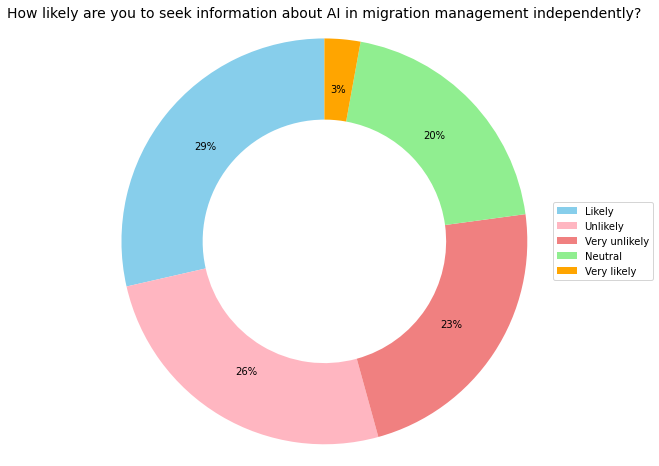

In [320]:
#Visulising the question 'How likely are you to seek information about AI in migration management independently?' using a pie chart

#Count the occurance of each ethnicity
information_counts = survey_df['seek information'].value_counts()

#Plot
plt.figure(figsize=(8, 8))
plt.pie(information_counts, labels=None,autopct='%1.0f%%', startangle=90, wedgeprops=dict(width=0.4), colors=custom_colours, pctdistance=0.75)
plt.legend(labels=information_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal') 
plt.title('How likely are you to seek information about AI in migration management independently?', fontsize=14)

#Display
plt.show()


# aggriagte ? chnage colour and use a colormap where darks are posistive and lights are negative 

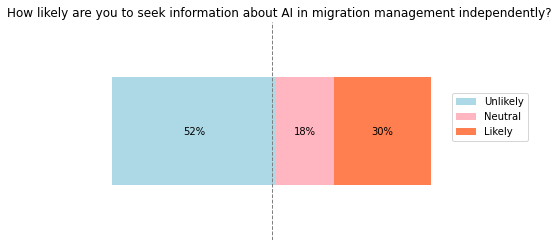

In [319]:
#Aggregating responces to the above question into overall 'likely, neutral and unlikely' for clearer s visulisation

#Categorise repsonces into sentiment catagories
pos_neg = {'Very unlikely': 'Unlikely', 
           'Unlikely': 'Unlikely',
           'Neutral': 'Neutral', 
           'Likely': 'Likely', 
           'Very likely': 'Likely'}

#Map and store in new column and set its type
survey_df['sentiment'] = uk_yes['seek information'].map(pos_neg) 
survey_df['sentiment'] = survey_df['sentiment'].astype(pd.CategoricalDtype(categories=['Unlikely', 'Neutral', 'Likely'], ordered=True))

#Calculate the percentage for each responce
sentiment_count = survey_df['sentiment'].value_counts(sort=False)
percentage = sentiment_count / sentiment_count.sum() * 100 

#Plot the stacked bar, add the 50% line
ax = percentage.to_frame().T.plot.barh(stacked=True, color= ['lightblue', 'lightpink','coral'])
ax.set_title('How likely are you to seek information about AI in migration management independently?') 
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1)
ax.legend(bbox_to_anchor=(1.0, 0.7))

#Remove axis's and spines
sns.despine()
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks([])
plt.xticks([])

#Add percentages labels
plt.text(percentage['Unlikely'] / 2, 0, f'{percentage["Unlikely"]:.0f}%', ha='center', va='center', fontsize=10)
plt.text(percentage['Unlikely'] + percentage['Neutral'] / 2, 0, f'{percentage["Neutral"]:.0f}%', ha='center', va='center', fontsize=10)
plt.text(percentage['Unlikely'] + percentage['Neutral'] +percentage['Likely']/ 2, 0, f'{percentage["Likely"]:.0f}%', ha='center', va='center', fontsize=10)

#Display
plt.show()
